In [16]:
import torch
import clip
from PIL import Image



In [17]:
# Load the CLIP model and processor
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)



In [19]:
def generate_caption(image_path, candidate_captions):
    """Generates a caption for an image using CLIP."""
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    text_inputs = clip.tokenize(candidate_captions).to(device)
    
    # Get image and text embeddings
    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_inputs)
    
    # Normalize features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    
    # Compute similarity
    similarities = (image_features @ text_features.T).squeeze(0)
    best_caption_index = similarities.argmax().item()
    
    return candidate_captions[best_caption_index]

# Example candidate captions
candidate_captions = [
    "A cat sitting on a table.",
    "A dog running in the park.",
    "A person riding a bicycle.",
    "A beautiful sunset over the ocean."
]


In [22]:
image_path = 'prompt.png'

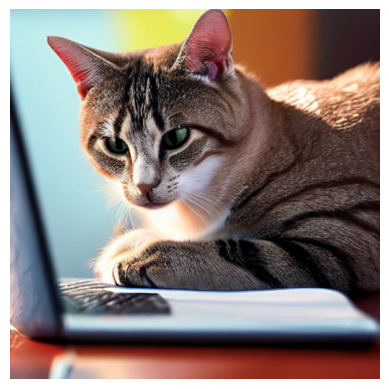

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()


In [24]:
caption = generate_caption(image_path, candidate_captions)
print("Generated Caption:", caption)

Generated Caption: A cat sitting on a table.
